In [1]:
from sympy import *
from sympy.abc import x
from sympy.solvers.ode.systems import dsolve_system

In [2]:
## defining the lorentian function
def lorentian(x, max, Gamma, x_resonance=0):
    return max*(Gamma**2/((x-x_resonance)**2+Gamma**2))


In [3]:
N_2=Function("N_2")(x) # N_2 is 
N_2d=Derivative(N_2, x)

N_1=Function("N_1")(x)
N_1d=Derivative(N_1, x)

N_Mot = Symbol("N_0")#10000
Gamma_exc = Symbol("Gamma_e")#1/N_Mot
Gamma_ry = Symbol("Gamma_ry")#10
Gamma_6p = Symbol("Gamma_6p")

eq2 = N_2d-N_Mot*Gamma_exc+N_2*Gamma_ry 
eq1 = N_1d-N_2*Gamma_ry+Gamma_6p*N_1

In [4]:
sol = dsolve(eq2, N_2)
sol

Eq(N_2(x), C1*exp(-Gamma_ry*x) + Gamma_e*N_0/Gamma_ry)

In [5]:
C1 = -Gamma_exc*N_Mot/Gamma_ry

def N_2(x): return C1*exp(-Gamma_ry*x)-C1

eq1 = N_1d-(C1*exp(-Gamma_ry*x)-C1)*Gamma_ry+Gamma_6p*N_1

sol = dsolve(eq1, N_1)
sol

Eq(N_1(x), C1*exp(-Gamma_6p*x) - Gamma_e*N_0*exp(-Gamma_ry*x)/(Gamma_6p - Gamma_ry) + Gamma_e*N_0/Gamma_6p)

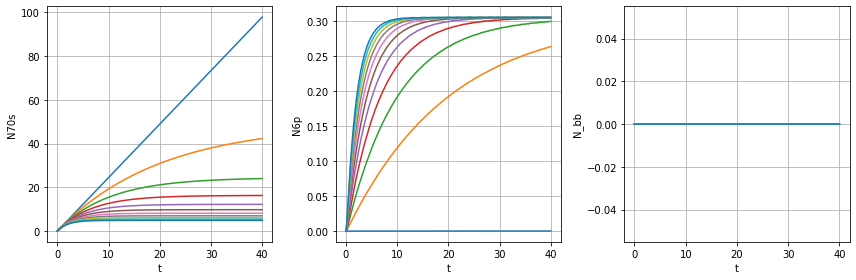

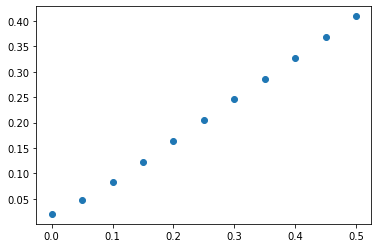

0.8796607626805154
[97.7330004266232, 42.26884668695397, 23.99608698681849, 16.255709824621995, 12.218015187142429, 9.77725375093261, 8.148032093482461, 6.984064721426534, 6.111061040123469, 5.432054788531992, 4.8888493743445895]


In [10]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

N_Mot = 10000
Gamma_exc = 2/N_Mot
Gamma_ry_ordine_0 = 1
Gamma_prova = 0
Gamma6p_blu = 0.1/N_Mot
Detuning = 2*np.pi*150
Dephasing = 2*np.pi*1
peso = 1/(1+(Detuning/Dephasing)**2)

Gamma_6p = 8
N_blokade = 6

sol1 = []
sol2 = []
sol_blackbody = []

plato = []

Gamma_ry_range = [0.00001, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]

for Gamma_ry in Gamma_ry_range:

    
    '''
    C1 = -Gamma_exc*N_Mot/Gamma_ry
    F2 = lambda t, s: -s*Gamma_ry+N_Mot*Gamma_exc
    F1 = lambda t, s: -s*Gamma_6p+Gamma_ry*(C1*exp(-Gamma_ry*t)-C1)

    t_eval = np.arange(0, 30, 0.01)
    sol2.append( solve_ivp(F2, [0, 30], [0], t_eval=t_eval) )
    sol1.append( solve_ivp(F1, [0, 30], [0], t_eval=t_eval) )
    '''
    # considering the blokade effect as a lorentian
    #F = lambda t, s: np.dot(np.array([[-Gamma_ry, Gamma_ry], [Gamma_ry, -(Gamma_6p+Gamma_ry)]]), s)+np.array([N_Mot*Gamma_exc*(N_blokade**2/(s[0]**2+N_blokade**2)), 0])
    # without blokade
    #F = lambda t, s: np.dot(np.array([[-Gamma_ry, Gamma_ry], [Gamma_ry, -(Gamma_6p+Gamma_ry)]]), s)+np.array([N_Mot*Gamma_exc, 0])
    # considering the blackbody states:
    F = lambda t, s: np.dot(np.array([[-Gamma_ry, 0, 0], [Gamma_ry, -(Gamma_6p), 0], [Gamma_prova, 0, 0]]), s)+np.array([N_Mot*(Gamma_exc+Gamma_ry_ordine_0*peso), 0, 0])
    

    t_eval = np.arange(0, 40, 0.01)
    sol = solve_ivp(F, [0, 40], [0, 0, 0], t_eval=t_eval)

    sol1.append(sol.y.T[:, 1])
    sol2.append(sol.y.T[:, 0])
    sol_blackbody.append(sol.y.T[:, 2])

    plato.append(sol.y.T[-1, 0]+sol.y.T[-1, 2])

plt.figure(figsize = (12, 4))
plt.subplot(131)
for sol in sol2:
    plt.plot(t_eval, sol)
plt.xlabel('t')
plt.ylabel('N70s')
plt.grid()
plt.subplot(132)
for sol in sol1:
    plt.plot(t_eval, sol)
plt.xlabel('t')
plt.ylabel('N6p')
plt.tight_layout()
plt.grid()
plt.subplot(133)
for sol in sol_blackbody:
    plt.plot(t_eval, sol)
plt.xlabel('t')
plt.ylabel('N_bb')
plt.tight_layout()
plt.grid()


plt.show()

y=[Gamma_exc*N_Mot/i for i in plato]
plt.plot(Gamma_ry_range, y, marker="o", linestyle="")

plt.show()

print(sol1[1][-1]/sol1[2][-1])
print(plato)

In [7]:
Gamma_ry_range = np.arange(0.01,0.3,0.01)
N6p = []
N70s = []

for Gamma_ry in Gamma_ry_range:
    F = lambda t, s: np.dot(np.array([[-Gamma_ry, Gamma_ry], [Gamma_ry, -(Gamma_6p+Gamma_ry)]]), s)+np.array([N_Mot*Gamma_exc, 0])

    t_eval = np.arange(0, 10, 0.01)
    sol = solve_ivp(F, [0, 10], [0, 0], t_eval=t_eval)

    N6p.append(sol.y.T[-1, 1])
    N70s.append(sol.y.T[-1, 0])

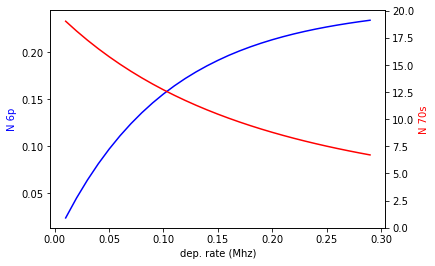

In [8]:
fig, ax1 = plt.subplots()

ax1.plot(Gamma_ry_range, N6p, label="N_6p", color="b")
ax1.set_ylabel('N 6p', color="b")

ax2 = ax1.twinx() 


ax2.plot(Gamma_ry_range, N70s, label="N_ry", color="r")
ax2.set_ylabel('N 70s', color="r")
ax2.set_ylim([0,max(N70s)+1])

ax1.set_xlabel("dep. rate (Mhz)")

plt.show()

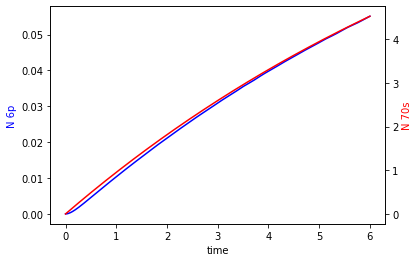

In [9]:
N_Mot = 10000
Gamma_exc = 1/N_Mot
Gamma_ry = 0.1
Gamma_6p = 8
C1 = -Gamma_exc*N_Mot/Gamma_ry

F = lambda t, s: np.dot(np.array([[-Gamma_ry, Gamma_ry], [Gamma_ry, -(Gamma_6p+Gamma_ry)]]), s)+np.array([N_Mot*Gamma_exc, 0])

#F = lambda t, s: np.array([-s*Gamma_ry+N_Mot*Gamma_exc, -s*Gamma_6p+Gamma_ry*(C1*exp(-Gamma_ry*t)-C1)])

t_eval = np.arange(0, 6.01, 0.01)
sol = solve_ivp(F, [0, 6], [0, 0], t_eval=t_eval)

fig, ax1 = plt.subplots()

ax1.plot(t_eval, sol.y.T[:, 1],label="N_6p", color="b")
ax1.set_ylabel('N 6p', color="b")

ax2 = ax1.twinx() 


ax2.plot(t_eval, sol.y.T[:, 0],label="N_ry", color="r")
ax2.set_ylabel('N 70s', color="r")

ax1.set_xlabel("time")

plt.show()